<a href="https://colab.research.google.com/github/rramachandra123/Image-of-Classification/blob/main/Image_Classification_Rameshvarman_Ramachandran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import TensorFlow**

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Mount Google Drive**

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Download and Explore the Pathway of Dataset**

In [69]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train')

**Image Count**

In [70]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2000


**Some Cats Photos**

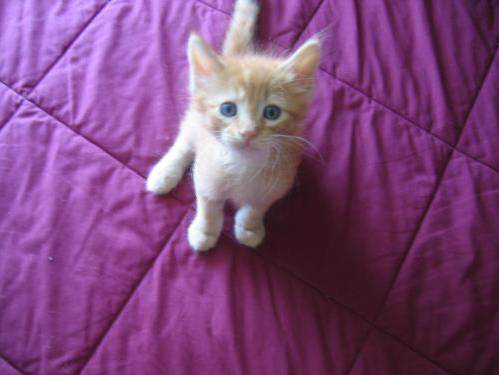

In [71]:
cats = list(data_dir.glob('cats/*'))
PIL.Image.open(str(cats[0]))

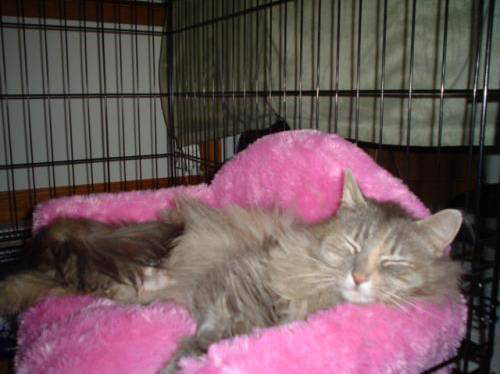

In [72]:
PIL.Image.open(str(cats[1]))

**Some Dogs Photos**

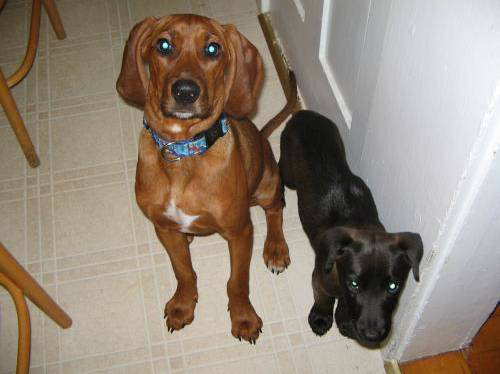

In [73]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))

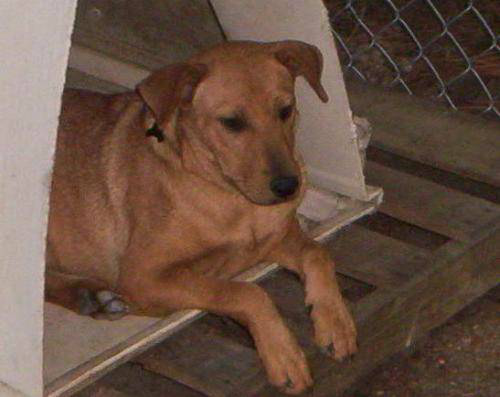

In [74]:
PIL.Image.open(str(dogs[1]))

**Create a Dataset**

In [75]:
batch_size = 40
img_height = 180
img_width = 180

** Let's use 80% of the images for training, and 20% for validation.**

In [76]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [77]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


**Class Names**

In [78]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


**Visualize the Data**

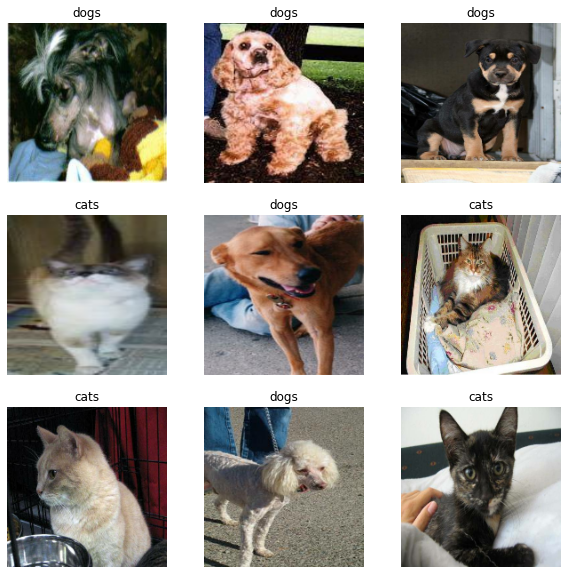

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [80]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(40, 180, 180, 3)
(40,)


**Configure the dataset for performance**

In [81]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Standardize the data**

In [82]:
normalization_layer = layers.Rescaling(1./255)

**There are two ways to use this layer. You can apply it to the dataset by calling Dataset.map:**



In [83]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.010588321 1.0


**Create a Model**

In [84]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compile the model**

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Summary**

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 64)       

**Train the Model**

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 51s 1s/step - loss: 0.8133 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 2/10
40/40 [==============================] - 49s 1s/step - loss: 0.6566 - accuracy: 0.6200 - val_loss: 0.6594 - val_accuracy: 0.5825
Epoch 3/10
40/40 [==============================] - 49s 1s/step - loss: 0.5738 - accuracy: 0.7013 - val_loss: 0.5687 - val_accuracy: 0.6975
Epoch 4/10
40/40 [==============================] - 49s 1s/step - loss: 0.5070 - accuracy: 0.7538 - val_loss: 0.6847 - val_accuracy: 0.6350
Epoch 5/10
40/40 [==============================] - 49s 1s/step - loss: 0.4561 - accuracy: 0.7812 - val_loss: 0.6150 - val_accuracy: 0.7075
Epoch 6/10
40/40 [==============================] - 50s 1s/step - loss: 0.3437 - accuracy: 0.8487 - val_loss: 0.6413 - val_accuracy: 0.7000
Epoch 7/10
40/40 [==============================] - 49s 1s/step - loss: 0.2602 - accuracy: 0.8994 - val_loss: 0.7358 - val_accuracy: 0.7000
Epoch 8/10
40/40 [==

# Visualize the Training Results

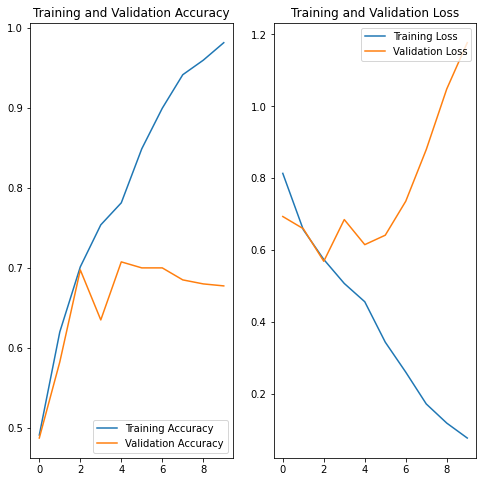

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Argumentation

In [88]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

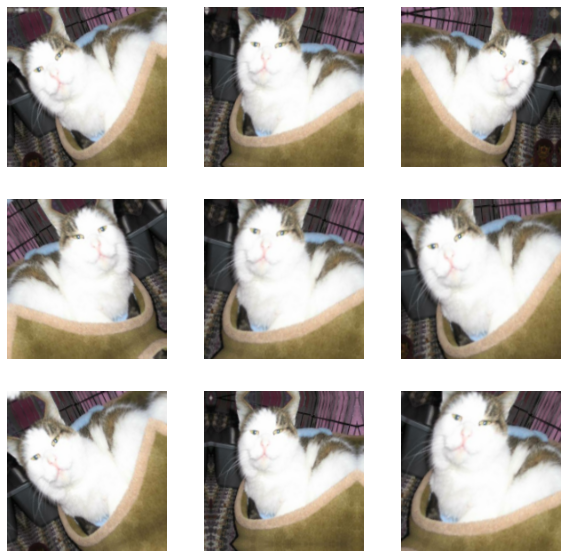

In [89]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Dropout

In [90]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile and Train the Model

In [91]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [93]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
40/40 [==============================] - 61s 1s/step - loss: 0.7816 - accuracy: 0.5113 - val_loss: 0.6864 - val_accuracy: 0.5175
Epoch 2/20
40/40 [==============================] - 58s 1s/step - loss: 0.6595 - accuracy: 0.6012 - val_loss: 0.6529 - val_accuracy: 0.5750
Epoch 3/20
40/40 [==============================] - 58s 1s/step - loss: 0.6409 - accuracy: 0.6425 - val_loss: 0.6020 - val_accuracy: 0.7125
Epoch 4/20
40/40 [==============================] - 57s 1s/step - loss: 0.6090 - accuracy: 0.6712 - val_loss: 0.5621 - val_accuracy: 0.7150
Epoch 5/20
40/40 [==============================] - 57s 1s/step - loss: 0.5889 - accuracy: 0.6875 - val_loss: 0.5659 - val_accuracy: 0.7050
Epoch 6/20
40/40 [==============================] - 57s 1s/step - loss: 0.5955 - accuracy: 0.6919 - val_loss: 0.5441 - val_accuracy: 0.7400
Epoch 7/20
40/40 [==============================] - 57s 1s/step - loss: 0.5611 - accuracy: 0.7194 - val_loss: 0.5347 - val_accuracy: 0.7200
Epoch 8/20
40/40 [==

# Visualize Training Results

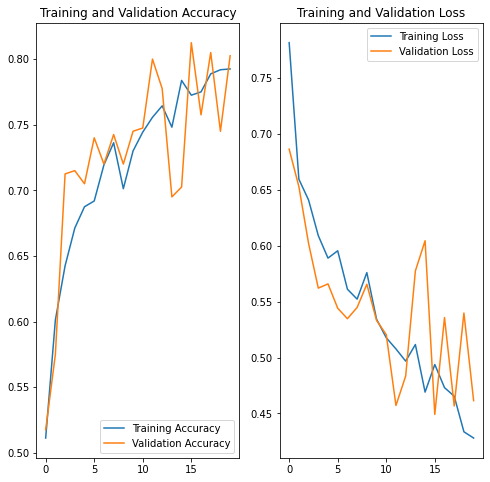

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [98]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to dogs with a 99.88 percent confidence.
